In [1]:
import pandas as pd
import numpy as np
import zipfile

In [15]:
aqi = pd.read_csv('data/aqi_df.csv', usecols={'State Name',
                                            'county Name',
                                            'Date',
                                            'AQI',
                                            'Category',
                                            'Defining Parameter',
                                            'Defining Site',
                                            'Number of Sites Reporting'})

# set columns to strings to keep leading zeros
dtype_dic= {'State Code':str,
            'County Code':str,
            'Site Number':str}
dtype = dtype_dic

# monitors=pd.read_csv('data/aqs_monitors.csv', usecols ={'State Code',
#                                                         'County Code',
#                                                         'Site Number',
#                                                         'Latitude',
#                                                         'Longitude',
#                                                         'Monitor Type'},
#                     dtype=dtype_dic)

In [16]:
aqi.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,DeKalb,2021-01-01,30,Good,Ozone,01-049-9991,1
1,Alabama,DeKalb,2021-01-02,27,Good,Ozone,01-049-9991,1
2,Alabama,DeKalb,2021-01-03,34,Good,Ozone,01-049-9991,1
3,Alabama,DeKalb,2021-01-04,36,Good,Ozone,01-049-9991,1
4,Alabama,DeKalb,2021-01-05,31,Good,Ozone,01-049-9991,1


In [17]:
aqi['Date'] = pd.to_datetime(aqi['Date'])

In [18]:
aqi['Date'].dtypes

dtype('<M8[ns]')

In [19]:
aqi['Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Unhealthy', 'Hazardous'], dtype=object)

In [27]:
aqi_unhealthy = aqi[aqi['AQI'] > 150]
aqi_unhealthy.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
623,Arizona,Maricopa,2021-01-01,272,Very Unhealthy,PM2.5,04-013-0019,24
627,Arizona,Maricopa,2021-01-05,176,Unhealthy,Ozone,04-013-5100,24
628,Arizona,Maricopa,2021-01-06,156,Unhealthy,Ozone,04-013-5100,24
631,Arizona,Maricopa,2021-01-09,154,Unhealthy,Ozone,04-013-5100,24
632,Arizona,Maricopa,2021-01-10,169,Unhealthy,Ozone,04-013-5100,24


In [28]:
len(aqi_unhealthy)

172850

In [33]:
aqi_unhealthy.loc[:, ('year')] = aqi_unhealthy.loc[:, ('Date')].dt.year

/Users/Grace/opt/anaconda3/envs/eds222/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [34]:
aqi_unhealthy.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,year
623,Arizona,Maricopa,2021-01-01,272,Very Unhealthy,PM2.5,04-013-0019,24,2021
627,Arizona,Maricopa,2021-01-05,176,Unhealthy,Ozone,04-013-5100,24,2021
628,Arizona,Maricopa,2021-01-06,156,Unhealthy,Ozone,04-013-5100,24,2021
631,Arizona,Maricopa,2021-01-09,154,Unhealthy,Ozone,04-013-5100,24,2021
632,Arizona,Maricopa,2021-01-10,169,Unhealthy,Ozone,04-013-5100,24,2021


In [66]:
counts_aqi_unhealthy = aqi_unhealthy.groupby('year').size().reset_index(name='count')
#counts_aqi_unhealthy

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in the US \nfrom 1980-2021'}, xlabel='year'>

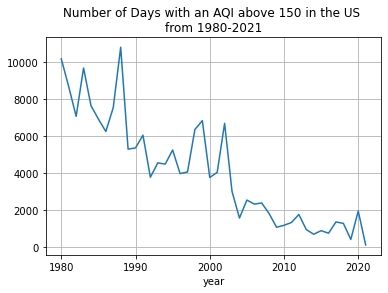

In [73]:
counts_aqi_unhealthy.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in the US \nfrom 1980-2021')

## Now for just California

In [80]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'California']
#aqi_unhealthy_ca.head()

In [78]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in CA \nfrom 1980-2021'}, xlabel='year'>

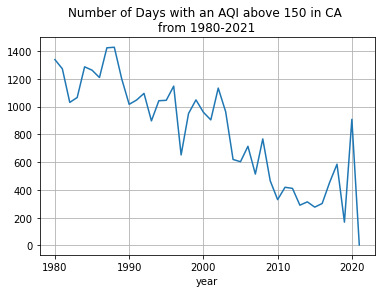

In [79]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in CA \nfrom 1980-2021')

## Now for Colorado

In [81]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'Colorado']

In [82]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021'}, xlabel='year'>

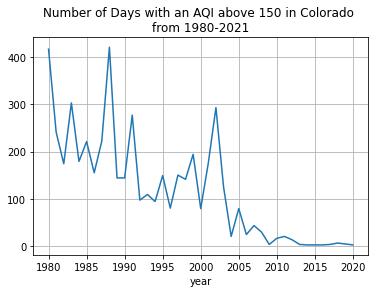

In [86]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021')

## Let's see what the trend is in New York

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in New York \nfrom 1980-2021'}, xlabel='year'>

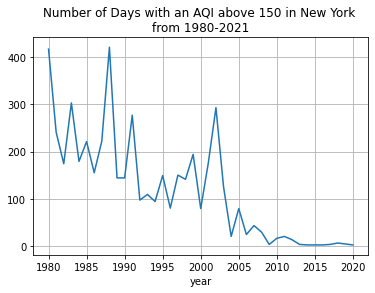

In [87]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'New York']
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in New York \nfrom 1980-2021')